In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the dataset 
df1 = pd.read_csv("C:\\Users\\Akon.usoh\\Desktop\\PERSONAL\\2023 PROJECTS\\DATASETS\\telecom_churn.csv")

In [3]:
df= df1.copy()

In [4]:
# Explore the data and identify missing values, duplicates, and inconsistent formatting.

# View the first five rows of the dataset 
df.head()

,Name,Email_Address,Phone_Number,MonthlyCharge,TotalCharges,Gender,PaymentMethod,TechSupport,Dependents,InternetService,...,OnlineSecurity,PaperlessBilling,StreamingMovies,Contract,OnlineBackup,PhoneService,StreamingTV,DeviceProtection,Partner,Churn
0,Maxwell Mcgee,MaxwellMcgee@akon.cloud,2346236787784,60564,6.564859e+08,Male,Bank transfer (automatic),Yes,No,DSL,...,Yes,Yes,Yes,Month-to-month,Yes,Yes,Yes,Yes,Yes,Yes
1,Hannah Connor,HannahConnor@akon.cloud,2341587604506,15683,9.137371e+08,Female,Credit card (automatic),Yes,Yes,DSL,...,Yes,Yes,Yes,Month-to-month,Yes,Yes,Yes,Yes,No,Yes
2,Rosemary Alexander,RosemaryAlexander@akon.cloud,2345264828126,56857,1.612852e+07,Female,Credit card (automatic),Yes,No,DSL,...,Yes,Yes,Yes,Month-to-month,Yes,No,Yes,Yes,Yes,No
3,Harry Hammond,HarryHammond@akon.cloud,2344468307143,65166,7.527761e+08,Male,Credit card (automatic),No,No,Fiber optic,...,No,Yes,No,Month-to-month,No,No,No,No,No,Yes
4,Boris Oatway,BorisOatway@akon.cloud,2342487538311,2119,7.667234e+08,Male,Bank transfer (automatic),No,No,Fiber optic,...,No,No,No,Month-to-month,No,No,No,No,Yes,Yes


In [5]:
# Check the shape of the dataset 
df.shape

(200000, 21)

In [6]:
df.columns
#The three dots between "InternetService" and "OnlineSecurity" indicates that there is hidden columns 
#in between thus we will view all the columns.

Index(['Name', 'Email_Address', 'Phone_Number', 'MonthlyCharge',
       'TotalCharges', 'Gender', 'PaymentMethod', 'TechSupport', 'Dependents',
       'InternetService', 'MultipleLines', 'OnlineSecurity',
       'PaperlessBilling', 'StreamingMovies', 'Contract', 'OnlineBackup',
       'PhoneService', 'StreamingTV', 'DeviceProtection', 'Partner', 'Churn'],
      dtype='object')

In [7]:
# Check for missing values 
df.isnull().sum()

Name                0
Email_Address       0
Phone_Number        0
MonthlyCharge       0
TotalCharges        0
Gender              0
PaymentMethod       0
TechSupport         0
Dependents          0
InternetService     0
MultipleLines       0
OnlineSecurity      0
PaperlessBilling    0
StreamingMovies     0
Contract            0
OnlineBackup        0
PhoneService        0
StreamingTV         0
DeviceProtection    0
Partner             0
Churn               0
dtype: int64

In [8]:
# Check for duplicates 
df.duplicated().sum()

0

In [9]:
# Check the data types of the columns 
df.dtypes

Name                 object
Email_Address        object
Phone_Number          int64
MonthlyCharge         int64
TotalCharges        float64
Gender               object
PaymentMethod        object
TechSupport          object
Dependents           object
InternetService      object
MultipleLines        object
OnlineSecurity       object
PaperlessBilling     object
StreamingMovies      object
Contract             object
OnlineBackup         object
PhoneService         object
StreamingTV          object
DeviceProtection     object
Partner              object
Churn                object
dtype: object

In [10]:
# Standardize formatting 
df['Gender'] = df['Gender'].replace(['Male','Female'],[0,1]) 

df['Partner'] = df['Partner'].replace(['Yes','No'],[1,0]) 

df['Dependents'] = df['Dependents'].replace(['Yes','No'],[1,0]) 

df['PhoneService'] = df['PhoneService'].replace(['Yes','No'],[1,0]) 

df['PaperlessBilling'] = df['PaperlessBilling'].replace(['Yes','No'],[1,0]) 

df['Churn'] = df['Churn'].replace(['Yes','No'],[1,0]) 

df['MultipleLines'] = df['MultipleLines'].replace(['Yes','No','No phone service'],[1,0,-1]) 

df['InternetService'] = df['InternetService'].replace(['DSL','Fiber optic','No'],[0,1,-1]) 

df['OnlineSecurity'] = df['OnlineSecurity'].replace(['Yes','No','No internet service'],[1,0,-1]) 

df['OnlineBackup'] = df['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,-1]) 

df['DeviceProtection'] = df['DeviceProtection'].replace(['Yes','No','No internet service'],[1,0,-1]) 

df['TechSupport'] = df['TechSupport'].replace(['Yes','No','No internet service'],[1,0,-1]) 

df['StreamingTV'] = df['StreamingTV'].replace(['Yes','No','No internet service'],[1,0,-1])

df['StreamingMovies'] = df['StreamingMovies'].replace(['Yes','No','No internet service'],[1,0,-1]) 

df['Contract'] = df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2]) 

df['PaymentMethod'] = df['PaymentMethod'].replace(['Electronic check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2])


In [11]:
#Drop data that do not contribute: Name, Email_Address, and Phone_Number
df.drop(['Name', 'Email_Address', 'Phone_Number'], axis=1, inplace=True)

In [12]:
#Check the cleaned data
df.head()

,MonthlyCharge,TotalCharges,Gender,PaymentMethod,TechSupport,Dependents,InternetService,MultipleLines,OnlineSecurity,PaperlessBilling,StreamingMovies,Contract,OnlineBackup,PhoneService,StreamingTV,DeviceProtection,Partner,Churn
0,60564,6.564859e+08,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1
1,15683,9.137371e+08,1,2,1,1,0,1,1,1,1,0,1,1,1,1,0,1
2,56857,1.612852e+07,1,2,1,0,0,1,1,1,1,0,1,0,1,1,1,0
3,65166,7.527761e+08,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,2119,7.667234e+08,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1


<AxesSubplot:xlabel='Churn', ylabel='count'>

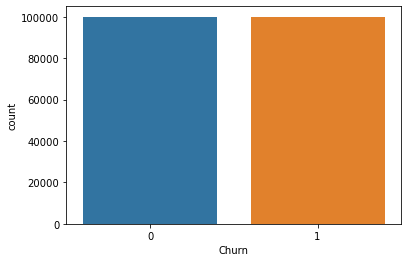

In [13]:
### 4. Visualize the data to identify patterns and factors that contribute to customer churn.
# Visualize churn rate
sns.countplot(x='Churn', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

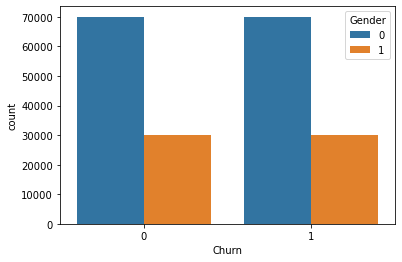

In [14]:
# Visualize churn rate by gender
sns.countplot(x='Churn', hue='Gender', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

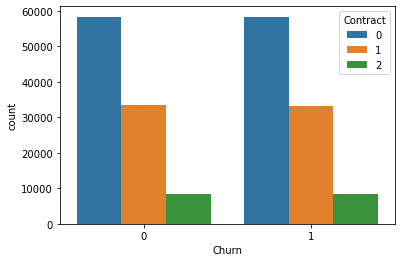

In [15]:
# Visualize churn rate by contract type
sns.countplot(x='Churn', hue='Contract', data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

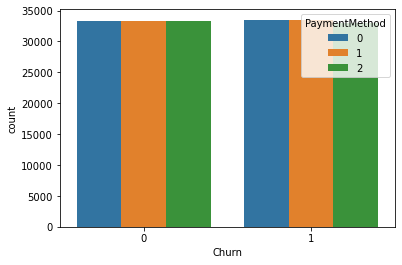

In [16]:
# Visualize churn rate by payment method
sns.countplot(x='Churn', hue='PaymentMethod', data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

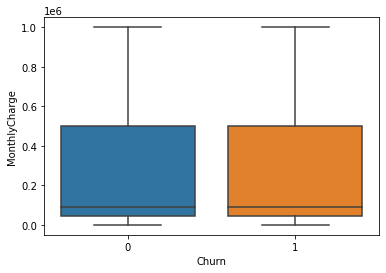

In [17]:
# Visualize churn rate by monthly charges
sns.boxplot(x='Churn', y='MonthlyCharge', data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

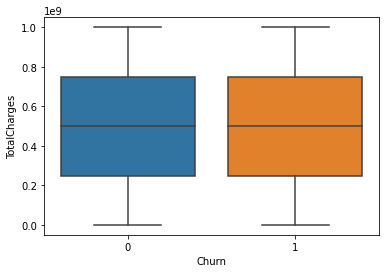

In [18]:
# Visualize churn rate by total charges
sns.boxplot(x='Churn', y='TotalCharges', data=df)

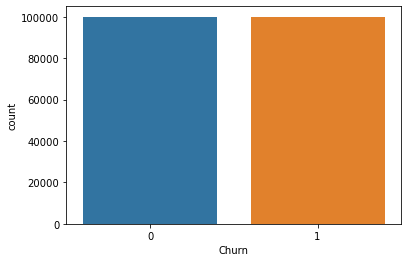

In [19]:
# Build a predictive model to identify customers at risk of churning.

#Based on our data exploration and visualization, we'll build a predictive model to identify customers at risk of churning. 

# View the distribution of our target variable
sns.countplot(x='Churn', data=df)
plt.show()

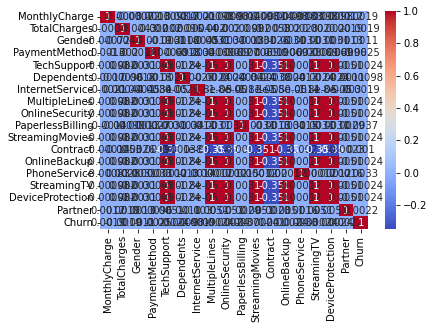

In [20]:
# View the correlation between features and our target variable
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

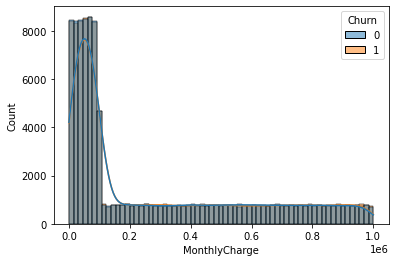

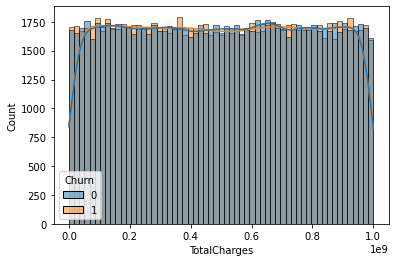

In [21]:
# View the distribution of monthly charges and total charges
sns.histplot(x='MonthlyCharge', data=df, hue='Churn', kde=True)
plt.show()
sns.histplot(x='TotalCharges', data=df, hue='Churn', kde=True)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
# train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the testing set
y_pred = rfc.predict(X_test)

In [25]:
# Evaluate the model's performance by calculating the accuracy and confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion matrix:', confusion)

Accuracy: 0.499925
Confusion matrix: [[10105  9817]
 [10186  9892]]


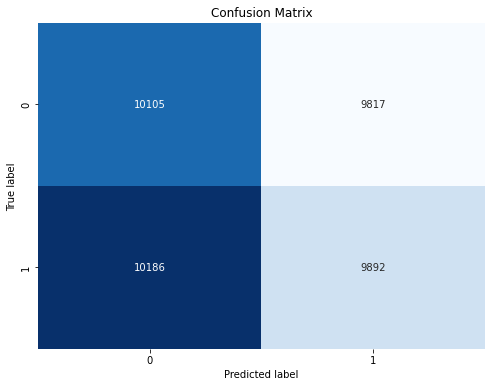

In [26]:
# generate a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

The output reflects an accuracy score of approximately 0.5 (or 50%) and a confusion matrix with two rows and two columns. 

The confusion matrix represents the true and predicted classes of a binary classification problem. The first row and first column correspond to the true negatives (TN), which are the number of negative samples that were correctly predicted as negative by the model. The second row and first column correspond to the false negatives (FN), which are the number of negative samples that were incorrectly predicted as positive by the model. 

The first row and second column correspond to the false positives (FP), which are the number of positive samples that were incorrectly predicted as negative by the model. 

The second row and second column correspond to the true positives (TP), which are the number of positive samples that were correctly predicted as positive by the model.

Based on the confusion matrix, the model correctly predicted 10105 true negatives and 9892 true positives, but misclassified 10186 false negatives and 9817 false positives. 

This means that the model is not performing well and is almost like guessing at random.

A better method would be to try and improve the performance of the model by optimizing the hyperparameters of the algorithm, using feature selection techniques to remove irrelevant or redundant features, or trying different machine learning algorithms altogether. It may also be helpful to gather more data or to balance the classes if there is a class imbalance. 

Additionally, it is important to choose appropriate evaluation metrics for the problem at hand, such as precision, recall, or F1-score, instead of solely relying on accuracy and this will be done in the next.

In [27]:
# Import libraries 
from sklearn.metrics import classification_report 

# print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50     19922
           1       0.50      0.49      0.50     20078

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000



The output retrieved is the classification report of a binary classification problem. It consists of evaluation metrics such as precision, recall, F1-score, and support for each class (0 and 1), as well as the macro and weighted average scores across both classes.

Precision measures the fraction of true positive predictions among all positive predictions made by the model, while recall measures the fraction of true positive predictions among all actual positive samples in the dataset. 

F1-score is the harmonic mean of precision and recall, and it is a metric that balances the importance of precision and recall for a given problem. The support column indicates the number of samples in each class.

In the classification report, the precision and recall for both classes are approximately 0.5, indicating that the model is making predictions at random. The F1-score is also 0.5, which is the harmonic mean of precision and recall, and the accuracy is 0.5, which means that the model is not performing well in distinguishing between the two classes.

The macro average score takes the unweighted mean of the precision, recall, and F1-score across both classes, while the weighted average score takes the weighted mean of the same metrics, weighted by the number of samples in each class. 

In this case, the macro and weighted average scores are the same since the dataset is balanced. The average scores of 0.5 for precision, recall, and F1-score indicate that the model is performing poorly for both classes.

In summary, the classification report shows that the model is not performing well in predicting the target variable, and it is likely that more work is needed to improve the model's performance.

To further improve the model, we will refer back to our feature engineering.
This is one of the reasons to make a copy of the data, rather than import the data afresh, we simply extract from the copy above.

In [28]:
df= df1.copy()

In [29]:
df.head()

,Name,Email_Address,Phone_Number,MonthlyCharge,TotalCharges,Gender,PaymentMethod,TechSupport,Dependents,InternetService,...,OnlineSecurity,PaperlessBilling,StreamingMovies,Contract,OnlineBackup,PhoneService,StreamingTV,DeviceProtection,Partner,Churn
0,Maxwell Mcgee,MaxwellMcgee@akon.cloud,2346236787784,60564,6.564859e+08,Male,Bank transfer (automatic),Yes,No,DSL,...,Yes,Yes,Yes,Month-to-month,Yes,Yes,Yes,Yes,Yes,Yes
1,Hannah Connor,HannahConnor@akon.cloud,2341587604506,15683,9.137371e+08,Female,Credit card (automatic),Yes,Yes,DSL,...,Yes,Yes,Yes,Month-to-month,Yes,Yes,Yes,Yes,No,Yes
2,Rosemary Alexander,RosemaryAlexander@akon.cloud,2345264828126,56857,1.612852e+07,Female,Credit card (automatic),Yes,No,DSL,...,Yes,Yes,Yes,Month-to-month,Yes,No,Yes,Yes,Yes,No
3,Harry Hammond,HarryHammond@akon.cloud,2344468307143,65166,7.527761e+08,Male,Credit card (automatic),No,No,Fiber optic,...,No,Yes,No,Month-to-month,No,No,No,No,No,Yes
4,Boris Oatway,BorisOatway@akon.cloud,2342487538311,2119,7.667234e+08,Male,Bank transfer (automatic),No,No,Fiber optic,...,No,No,No,Month-to-month,No,No,No,No,Yes,Yes


In [30]:
# Separate the features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [31]:
# Define the categorical and numerical columns
categorical_cols = ['Gender', 'PaymentMethod', 'TechSupport', 'Dependents', 'InternetService', 'OnlineSecurity', 'PaperlessBilling', 'StreamingMovies', 'Contract', 'OnlineBackup', 'PhoneService', 'StreamingTV', 'DeviceProtection', 'Partner']
numeric_cols = ['MonthlyCharge', 'TotalCharges']

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the column transformer to apply one-hot encoding and standard scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numeric_cols)])

In [33]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Fit the preprocessor on the training set
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['Gender', 'PaymentMethod', 'TechSupport',
                                  'Dependents', 'InternetService',
                                  'OnlineSecurity', 'PaperlessBilling',
                                  'StreamingMovies', 'Contract', 'OnlineBackup',
                                  'PhoneService', 'StreamingTV',
                                  'DeviceProtection', 'Partner']),
                                ('num', StandardScaler(),
                                 ['MonthlyCharge', 'TotalCharges'])])

In [35]:
# Transform the training and test sets
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Train a random forest classifier on the transformed training set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_transformed, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Predict the churn labels for the whole dataset
X_transformed = preprocessor.transform(X)
y_pred = rf.predict(X_transformed)

In [38]:
# Add the predicted labels to the original dataset
df['Churn_Prediction'] = y_pred

In [39]:
df.head()

,Name,Email_Address,Phone_Number,MonthlyCharge,TotalCharges,Gender,PaymentMethod,TechSupport,Dependents,InternetService,...,PaperlessBilling,StreamingMovies,Contract,OnlineBackup,PhoneService,StreamingTV,DeviceProtection,Partner,Churn,Churn_Prediction
0,Maxwell Mcgee,MaxwellMcgee@akon.cloud,2346236787784,60564,6.564859e+08,Male,Bank transfer (automatic),Yes,No,DSL,...,Yes,Yes,Month-to-month,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Hannah Connor,HannahConnor@akon.cloud,2341587604506,15683,9.137371e+08,Female,Credit card (automatic),Yes,Yes,DSL,...,Yes,Yes,Month-to-month,Yes,Yes,Yes,Yes,No,Yes,Yes
2,Rosemary Alexander,RosemaryAlexander@akon.cloud,2345264828126,56857,1.612852e+07,Female,Credit card (automatic),Yes,No,DSL,...,Yes,Yes,Month-to-month,Yes,No,Yes,Yes,Yes,No,No
3,Harry Hammond,HarryHammond@akon.cloud,2344468307143,65166,7.527761e+08,Male,Credit card (automatic),No,No,Fiber optic,...,Yes,No,Month-to-month,No,No,No,No,No,Yes,Yes
4,Boris Oatway,BorisOatway@akon.cloud,2342487538311,2119,7.667234e+08,Male,Bank transfer (automatic),No,No,Fiber optic,...,No,No,Month-to-month,No,No,No,No,Yes,Yes,No


In [40]:
#Drop the initial Churn column
df.drop(['Churn'], axis=1, inplace=True)

In [41]:
df.sample(10)

,Name,Email_Address,Phone_Number,MonthlyCharge,TotalCharges,Gender,PaymentMethod,TechSupport,Dependents,InternetService,...,OnlineSecurity,PaperlessBilling,StreamingMovies,Contract,OnlineBackup,PhoneService,StreamingTV,DeviceProtection,Partner,Churn_Prediction
6046,Russel Richardson,RusselRichardson@akon.cloud,2341587781152,15623,3.144709e+08,Male,Credit card (automatic),No,Yes,No,...,No,Yes,No,One year,No,Yes,No,No,No,No
141569,Eduardo Rose,EduardoRose@akon.cloud,2346745157878,173544,5.207567e+08,Male,Electronic check,No internet service,Yes,DSL,...,No internet service,No,No internet service,Month-to-month,No internet service,No,No internet service,No internet service,No,No
151514,Tyler Vernon,TylerVernon@akon.cloud,2347287473123,533959,6.122550e+08,Male,Credit card (automatic),Yes,Yes,No,...,Yes,Yes,Yes,Month-to-month,Yes,Yes,Yes,Yes,Yes,Yes
140938,George Burnley,GeorgeBurnley@akon.cloud,2343722034663,96438,5.644528e+06,Male,Bank transfer (automatic),No,No,DSL,...,No,No,No,One year,No,No,No,No,No,No
75581,Jayden Norris,JaydenNorris@akon.cloud,2345037851025,7154,7.564732e+08,Male,Credit card (automatic),No internet service,Yes,DSL,...,No internet service,No,No internet service,Month-to-month,No internet service,Yes,No internet service,No internet service,Yes,Yes
150687,Lauren Aldridge,LaurenAldridge@akon.cloud,2344751672330,895856,1.346055e+07,Female,Credit card (automatic),No,No,No,...,No,Yes,No,Month-to-month,No,Yes,No,No,No,No
80180,Nicholas Dwyer,NicholasDwyer@akon.cloud,2346618202258,45983,4.117402e+08,Male,Electronic check,Yes,No,DSL,...,Yes,No,Yes,One year,Yes,No,Yes,Yes,Yes,Yes
89060,Rick Cartwright,RickCartwright@akon.cloud,2348212181342,38110,6.888394e+07,Male,Bank transfer (automatic),Yes,Yes,No,...,Yes,No,Yes,One year,Yes,Yes,Yes,Yes,Yes,Yes
39625,Elijah Fowler,ElijahFowler@akon.cloud,2347035316204,95877,9.000258e+08,Male,Bank transfer (automatic),Yes,No,No,...,Yes,No,Yes,Month-to-month,Yes,No,Yes,Yes,Yes,Yes
108561,Renee Vince,ReneeVince@akon.cloud,2341834042277,398442,4.588989e+08,Female,Bank transfer (automatic),No,Yes,No,...,No,Yes,No,One year,No,No,No,No,Yes,No


In [43]:
df.isnull().sum()

Name                0
Email_Address       0
Phone_Number        0
MonthlyCharge       0
TotalCharges        0
Gender              0
PaymentMethod       0
TechSupport         0
Dependents          0
InternetService     0
MultipleLines       0
OnlineSecurity      0
PaperlessBilling    0
StreamingMovies     0
Contract            0
OnlineBackup        0
PhoneService        0
StreamingTV         0
DeviceProtection    0
Partner             0
Churn_Prediction    0
dtype: int64

In [42]:
# Save the updated dataset to a new CSV file
df.to_csv('Churn_dataset_predicted.csv', index=False)

You can find the visualization on my Dashboard and the project proposal document details my thought process for this project. Feel free to reach out to me via LinkedIn if you have any questions or need additional clarification.

<a href="https://linkedin.com/in/akonusoh">LinkedIn Page</a>